# Preparing the ambient

First, we need prepare the packages that we will use.
The packages are "DataFrames", "CSV", "StatsPlots", "Statistics".

In [39]:
using DataFrames
using CSV
using Plots
using StatsPlots
using Statistics

# Getting the Cleveland Dataset
To start we need to import the dataset and treat some problems.
There were 6 missing values, because it is a really small part of the total(1.9%), we just remove every missing data.
   

## Link
[Link to the oficial page](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [40]:
function GetCleveland(path::String)
    # Reading the dataset
    cleveland = DataFrame(CSV.File(path))

    # Setting name in every column
    rename!(cleveland, [:age, :sex, :cp, :trestbps, :chol, :fbs, :restecg, :thalach, :exang, :oldpeak, :slope, :ca, :thal, :alvo])

    # Allowing missing data and setting missing
    allowmissing!(cleveland)
    cleveland .= ifelse.(cleveland .== "?", missing, cleveland)
    dropmissing!(cleveland)

    # Changing ca and thal types (defaulted as string)
    cleveland.ca = parse.(Float16, cleveland.ca)
    cleveland.thal = parse.(Float16, cleveland.thal)
    
    # Parse to int
    cleveland.sex = trunc.(Int, cleveland.sex)
    cleveland.cp = trunc.(Int, cleveland.cp)
    cleveland.restecg = trunc.(Int, cleveland.restecg)
    cleveland.exang = trunc.(Int, cleveland.exang)
    cleveland.slope = trunc.(Int, cleveland.slope)
    cleveland.ca = trunc.(Int, cleveland.ca)
    cleveland.thal = trunc.(Int, cleveland.thal)
    
    # Making alvo binary
    #cleveland.alvo = map(a -> a == 0 ? 0 : 1, cleveland.alvo)

    return cleveland
end

GetCleveland (generic function with 1 method)

# Output

In [41]:
cleveland = GetCleveland("Data/processed.cleveland.data")
describe(cleveland)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,age,54.5135,29.0,56.0,77.0,,,Float64
2,sex,0.675676,0,1.0,1,,,Int64
3,cp,3.16554,1,3.0,4,,,Int64
4,trestbps,131.649,94.0,130.0,200.0,,,Float64
5,chol,247.399,126.0,243.0,564.0,,,Float64
6,fbs,0.141892,0.0,0.0,1.0,,,Float64
7,restecg,0.993243,0,1.0,2,,,Int64
8,thalach,149.598,71.0,153.0,202.0,,,Float64
9,exang,0.327703,0,0.0,1,,,Int64


# Categorical Data
Creating the functions to plot the categorical data.

In [43]:
function show_categorical(array::Array{<:Number, 1}, types::Array{<:Number, 1}, labels::Array{<:String, 1}, title::String; legend = :right)

    tempProportion = zeros(length(types))
    totalProportion = length(array)
    for i = 1:length(types)
        tempProportion[i] = length(filter(a -> a == types[i] , array)) / totalProportion
        labels[i] *= " $(round(tempProportion[i] * 100, digits=2))%"
    end
    return pie(labels, tempProportion; title=title, legend = legend, size=(300, 100))

end

function PlotCategoricalAttributes(cleveland::DataFrame)    
    # SEX
    h1 = show_categorical(cleveland.sex, [0, 1], ["Women", "Men"], "Sex Proportion in Dataset")
    
    # CP
    h2 = show_categorical(cleveland.cp, [1, 2, 3, 4], ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"], "Chest Pain Type"; legend=:left)
      
    # FBS
    h4 =show_categorical(cleveland.fbs, [0, 1], ["False", "True"], "Fasting Blood Sugar > 120 mg/dl", legend=:left)
    
    # restecg
    h3=show_categorical(cleveland.restecg, [0, 1, 2], ["Normal", "Abnormality", "LVH"], " Resting Electrocardiographic Results"; legend=:right)
    
    # exang
    h5 = show_categorical(cleveland.exang, [0, 1], ["False", "True"], "Exercise Induced Angina")
    
    # slope
    h6 = show_categorical(cleveland.slope, [1, 2, 3], ["Upsloping", "Flat", "Downsloping"], "Slope"; legend=:left)
    
    # thal
    h7 = show_categorical(cleveland.thal, [3, 6, 7], ["Normal", "Fixed Defect", "Reversable Defect"], "Thal")
    
    # alvo
    h8 = show_categorical(cleveland.alvo, [0, 1, 2, 3, 4], ["Grau 0", "Grau 1", "Grau 2", "Grau 3", "Grau 4"], "diagnosis of heart disease", legend=:left)
    
    plot(h1, h2, h3, h4, h5, h6, h7, h8, layout=(4,2), size=(1000, 400 * 4))
    
end

PlotCategoricalAttributes (generic function with 1 method)

# Output

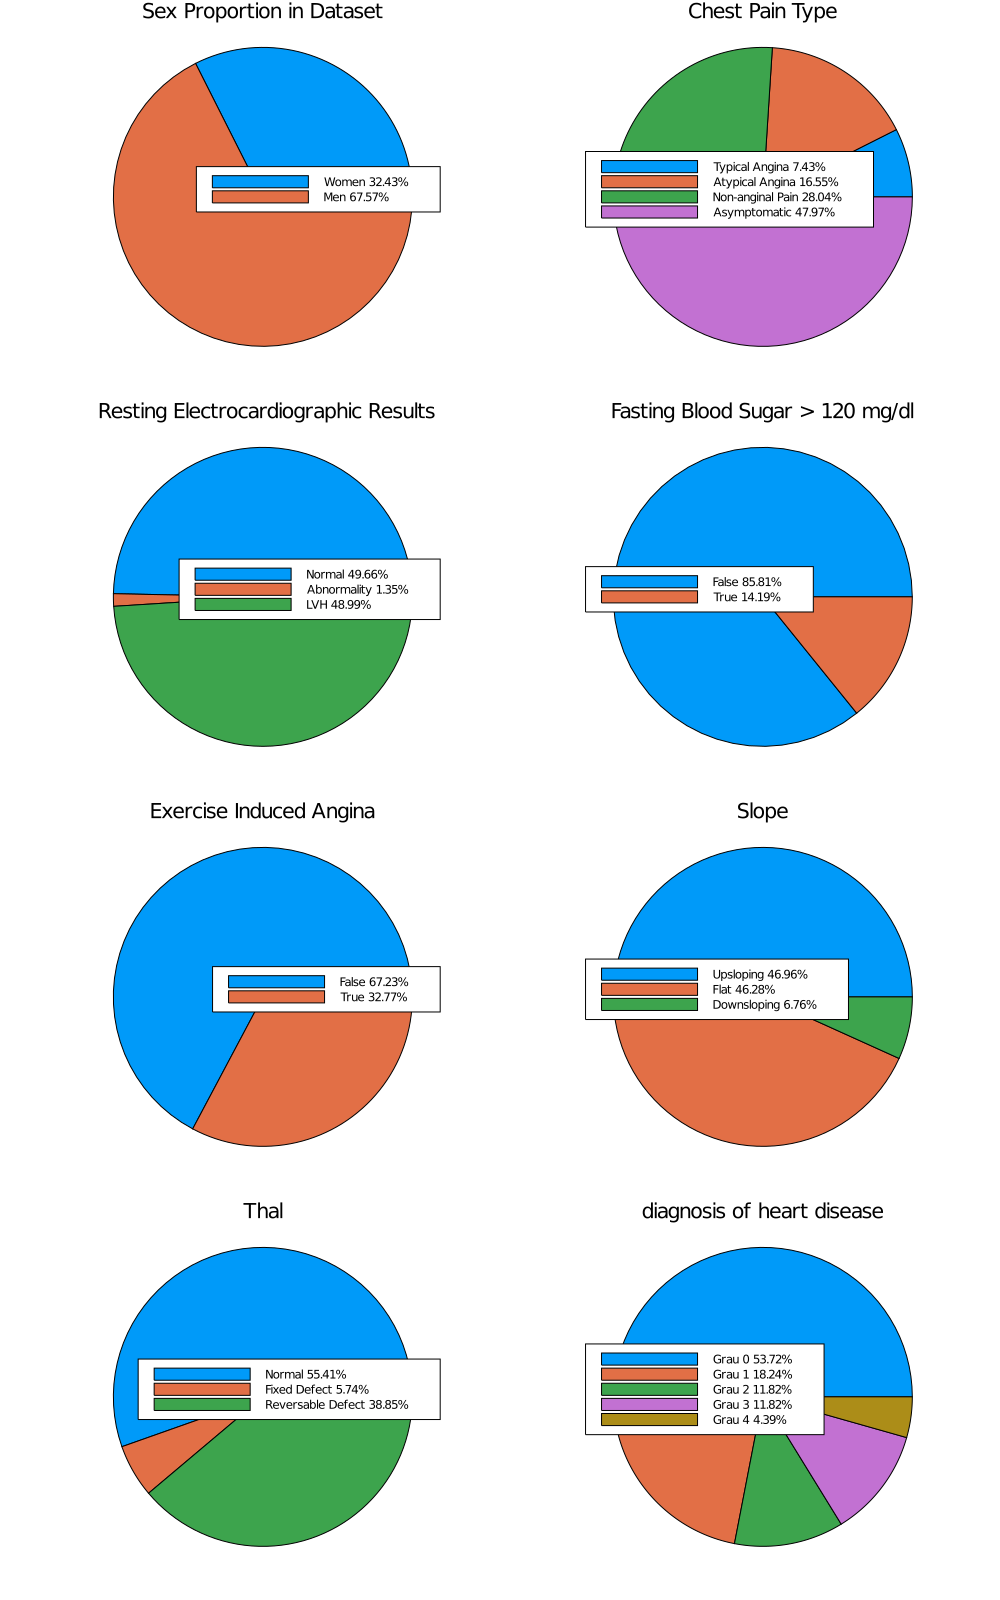

In [44]:
PlotCategoricalAttributes(cleveland)

# Numerical Data
Creating the function to plot numerical data.

In [47]:
function PlotNumericalAttributes(cleveland::DataFrame)
    h1 = histogram(cleveland.age, title="Range of age", labels="Age")
    h2 = histogram(cleveland.trestbps, title="Range of trestbps", labels="trestbps")
    h3 = histogram(cleveland.chol, title="Range of chol", labels="chol")
    h4 = histogram(cleveland.thalach, title="Range of thalach", labels="thalach")
    h5 = histogram(cleveland.oldpeak, title="Range of oldpeak", labels="oldpeak")
    h6 = histogram(cleveland.ca, title="Range of ca", labels="ca")
    
    plot(h1, h2, h3, h4, h5, h6, layout=(3, 2), size=(500 * 2,800), legend=false)
end

PlotNumericalAttributes (generic function with 1 method)

# Output

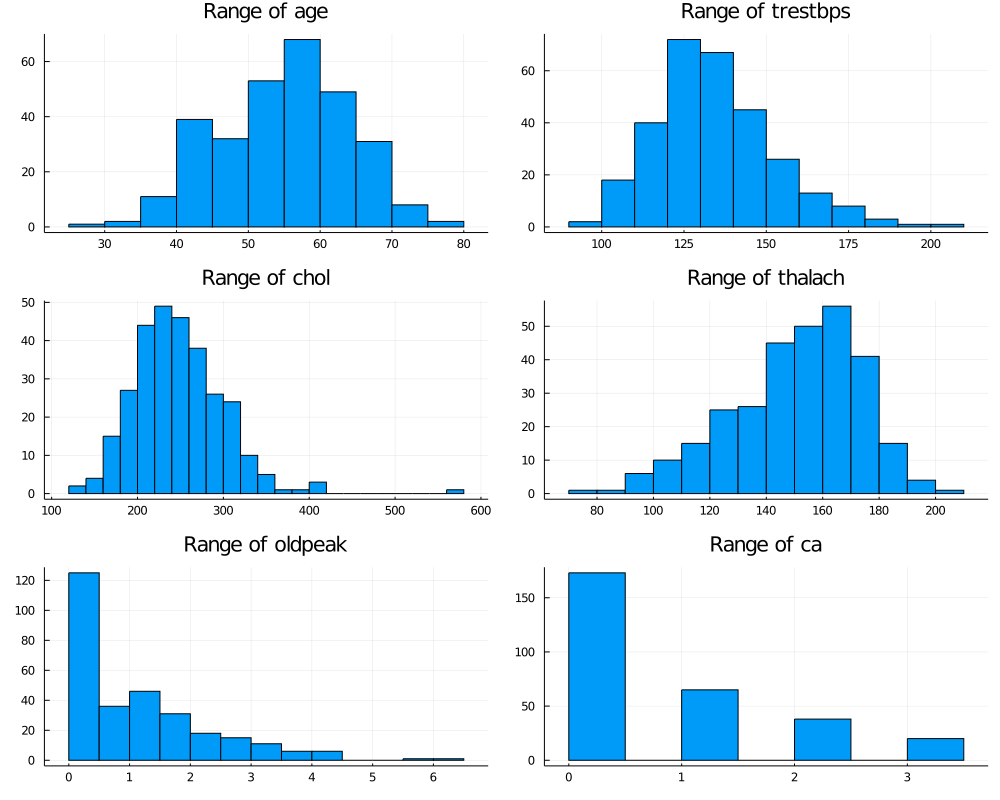

In [51]:
PlotNumericalAttributes(cleveland)

# Correlation Matrix

In [53]:
function correlation(cleveland::DataFrame)
    _size = size(cleveland)[2]
    corMatrix = zeros(_size, _size)
    
    for i = 1:_size
        for j = i:_size
            corMatrix[j, i] = cor(cleveland[:, i], cleveland[:, j])
            #corMatrix[j, i] = corMatrix[i, j]
        end
    end
    
    return corMatrix
end

correlation (generic function with 1 method)

# Output

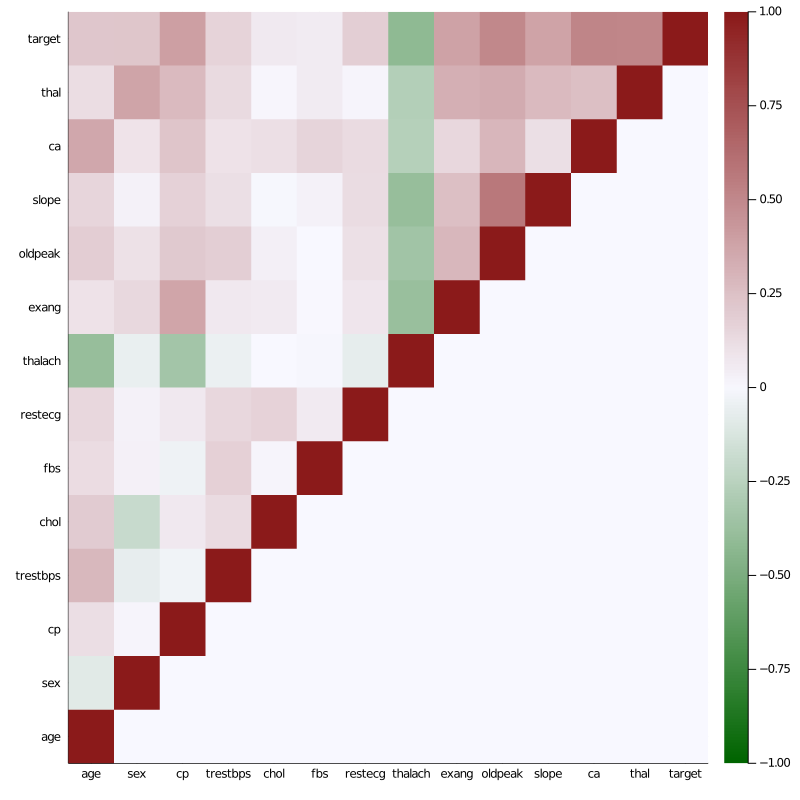

In [57]:
correlationM = correlation(cleveland)


summary = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
color =  cgrad([:darkgreen, :ghostwhite, :firebrick4], 100)




heatmap(summary, summary, correlationM, size = [800, 800], c = color, clims=(-1, 1), discrete_values=true)

In [35]:
s = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
best = findall(x -> (x >= 0.37 && x < 1.0) || (x <= -0.37 && x > -1.0), correlationM)

#= BESTS

1- (thalach, age) # REAL x REAL
2- (thal, sex) # CAT x CAT
3- (exang, cp) # CAT X CAT
4- (alvo, cp) # CAT X CAT
5- (exang, thalach) # CAT x REAL
6- (slope, thalach) # CAT X REAL
7- (alvo, thalach) # CAT X REAL
8- (alvo, exang) # CAT X CAT
9- (slope, oldpeak) # CAT X REAL
10-(alvo, oldpeak) # CATX REAL
11-(alvo, ca) # CAT X CAT
12-(alvo, thal) # CAT X CAT

=#
println("As correlações mais fortes encontradas pela matriz de correlações:\n")
for cord in best
    println("$(s[cord[1]]) x $(s[cord[2]])")
end

As correlações mais fortes encontradas pela matriz de correlações:

thalach x age
thal x sex
exang x cp
target x cp
exang x thalach
slope x thalach
target x thalach
target x exang
slope x oldpeak
target x oldpeak
target x slope
target x ca
target x thal


# Scatter WIP

## DEVELOPING...

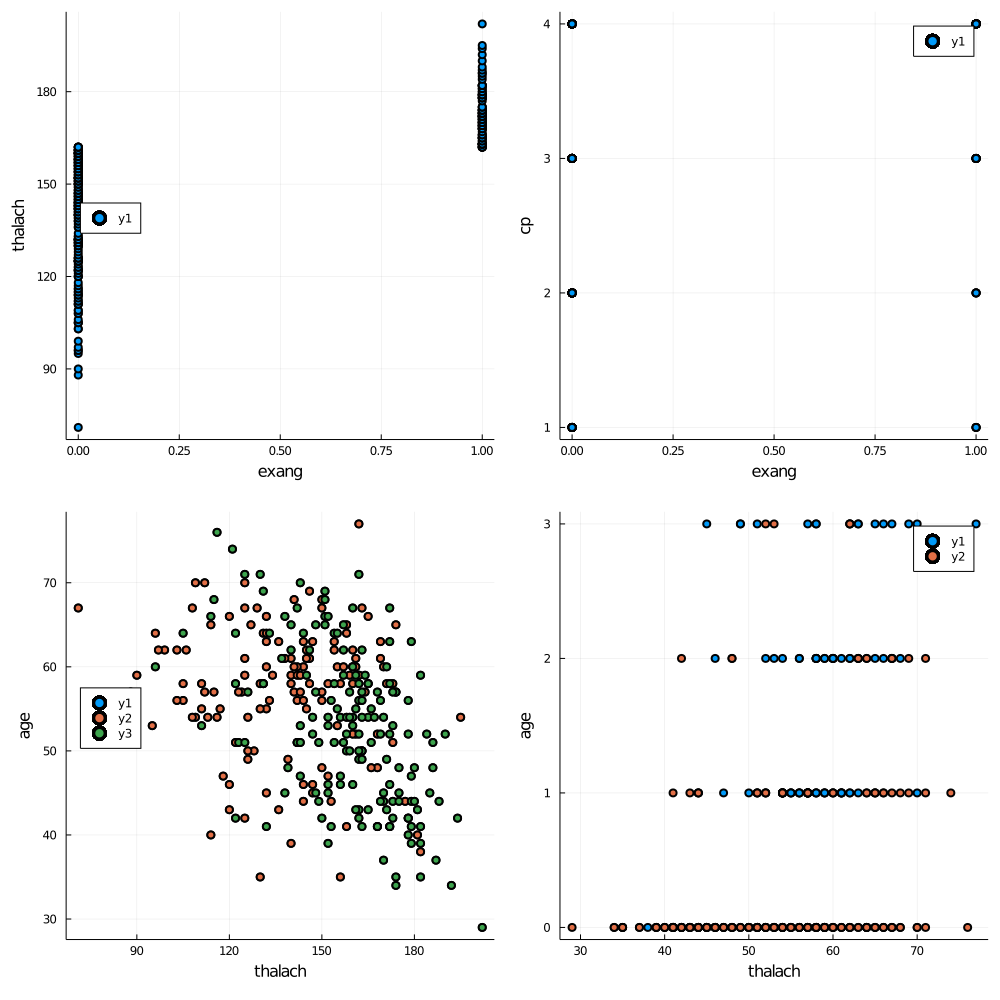

In [26]:
function ScatterCleveland(cleveland::DataFrame, path::String)
    # SPLIT
    cleveland_1 = filter(row -> row.alvo != 0, cleveland)
    cleveland_0 = filter(row -> row.alvo == 0, cleveland)
        
    # SCATTER
    
    #= BESTS


    1- (thalach, age) # REAL x REAL
    2- (thal, sex) # CAT x CAT
    3- (exang, cp) # CAT X CAT
    4- (alvo, cp) # CAT X CAT
    5- (exang, thalach) # CAT x REAL
    6- (slope, thalach) # CAT X REAL
    7- (alvo, thalach) # CAT X REAL
    8- (alvo, exang) # CAT X CAT
    9- (slope, oldpeak) # CAT X REAL
    10-(alvo, oldpeak) # CATX REAL
    11-(alvo, ca) # CAT X CAT
    12-(alvo, thal) # CAT X CAT


    =#
    

    h1 = plot(sort(cleveland.exang), sort(cleveland.thalach), seriestype=:scatter, xlabel = "exang", ylabel = "thalach", legend=:left)
    
    h2 = plot(cleveland.exang, cleveland.cp, seriestype=:scatter, xlabel = "exang", ylabel = "cp")
    
    h3 = plot(cleveland.thalach, cleveland.age, seriestype=:scatter, xlabel = "thalach", ylabel = "age")
    plot!(cleveland_1.thalach, cleveland_1.age, seriestype=:scatter, xlabel = "thalach", ylabel = "Age", legend=:left)
    plot!(cleveland_0.thalach, cleveland_0.age, seriestype=:scatter, xlabel = "thalach", ylabel = "age")
    
    
    
    h4 = plot(cleveland_1.age, cleveland_1.ca, seriestype=:scatter, xlabel = "thalach", ylabel = "age")
    plot!(cleveland_0.age, cleveland_0.ca, seriestype=:scatter, xlabel = "thalach", ylabel = "age")
    
    plot(h1, h2, h3, h4, layout=(2, 2), size=(500 * 2, 500 * 2))
    
    
    #bar(cleveland.alvo, cleveland.thalach, title="exang x thalach", xlabel="exang", ylabel="thalach")
end

ScatterCleveland(cleveland, "Scatter.png")